In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("synthetic_personal_finance_dataset.csv")

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (32424, 20)


,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,loan_type,loan_amount_usd,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio,region,record_date
0,U00001,56,Female,High School,Self-employed,Salesperson,3531.69,1182.59,367655.03,No,NaN,0.00,0,0.00,0.00,0.00,430,8.68,Other,2024-01-09
1,U00002,19,Female,PhD,Employed,Salesperson,3531.73,2367.99,260869.10,Yes,Education,146323.34,36,4953.50,13.33,1.40,543,6.16,North America,2022-02-13
2,U00003,20,Female,Master,Employed,Teacher,2799.49,1003.91,230921.21,No,NaN,0.00,0,0.00,0.00,0.00,754,6.87,Africa,2022-05-12
3,U00004,25,Male,PhD,Employed,Manager,5894.88,4440.12,304815.51,Yes,Business,93242.37,24,4926.57,23.93,0.84,461,4.31,Europe,2023-10-02
4,U00005,53,Female,PhD,Employed,Student,5128.93,4137.61,461509.48,No,NaN,0.00,0,0.00,0.00,0.00,516,7.50,Africa,2021-08-07


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32424 entries, 0 to 32423
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  32424 non-null  object 
 1   age                      32424 non-null  int64  
 2   gender                   32424 non-null  object 
 3   education_level          32424 non-null  object 
 4   employment_status        32424 non-null  object 
 5   job_title                32424 non-null  object 
 6   monthly_income_usd       32424 non-null  float64
 7   monthly_expenses_usd     32424 non-null  float64
 8   savings_usd              32424 non-null  float64
 9   has_loan                 32424 non-null  object 
 10  loan_type                12995 non-null  object 
 11  loan_amount_usd          32424 non-null  float64
 12  loan_term_months         32424 non-null  int64  
 13  monthly_emi_usd          32424 non-null  float64
 14  loan_interest_rate_pct

,age,monthly_income_usd,monthly_expenses_usd,savings_usd,loan_amount_usd,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio
count,32424.000000,32424.000000,32424.000000,3.242400e+04,32424.000000,32424.000000,32424.000000,32424.000000,32424.000000,32424.000000,32424.000000
mean,43.415865,4027.863185,2419.444709,2.437520e+05,100114.735992,58.500000,3092.992339,6.616332,1.194881,575.260424,5.045431
std,14.978246,1916.773353,1388.893084,1.915772e+05,152536.588635,104.865373,6478.939776,9.472964,3.761964,159.023227,2.851344
min,18.000000,500.000000,150.010000,6.359600e+02,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,0.100000
25%,30.000000,2657.795000,1397.497500,8.629155e+04,0.000000,0.000000,0.000000,0.000000,0.000000,437.000000,2.580000
50%,43.000000,3997.740000,2219.575000,2.017003e+05,0.000000,0.000000,0.000000,0.000000,0.000000,575.000000,5.040000
75%,56.000000,5351.607500,3254.037500,3.589662e+05,189499.070000,60.000000,3574.567500,13.140000,0.920000,714.000000,7.510000
max,69.000000,12404.050000,10082.710000,1.237774e+06,499954.750000,360.000000,47723.840000,30.000000,90.670000,850.000000,10.000000


In [4]:
df = df.drop(columns=["user_id", "record_date"])

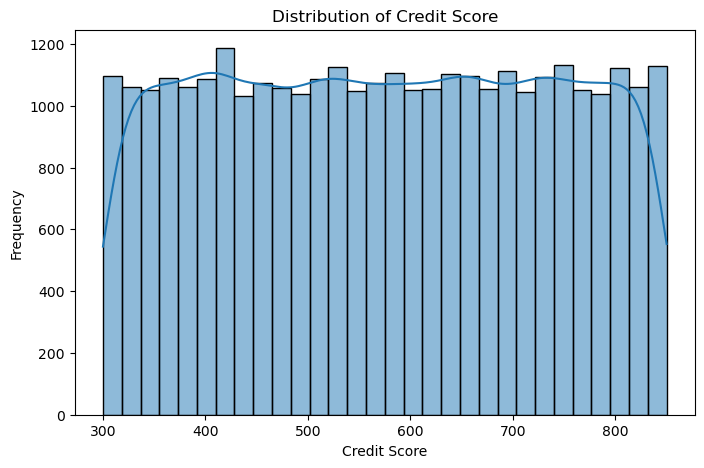

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df["credit_score"], bins=30, kde=True)
plt.title("Distribution of Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Frequency")
plt.show()

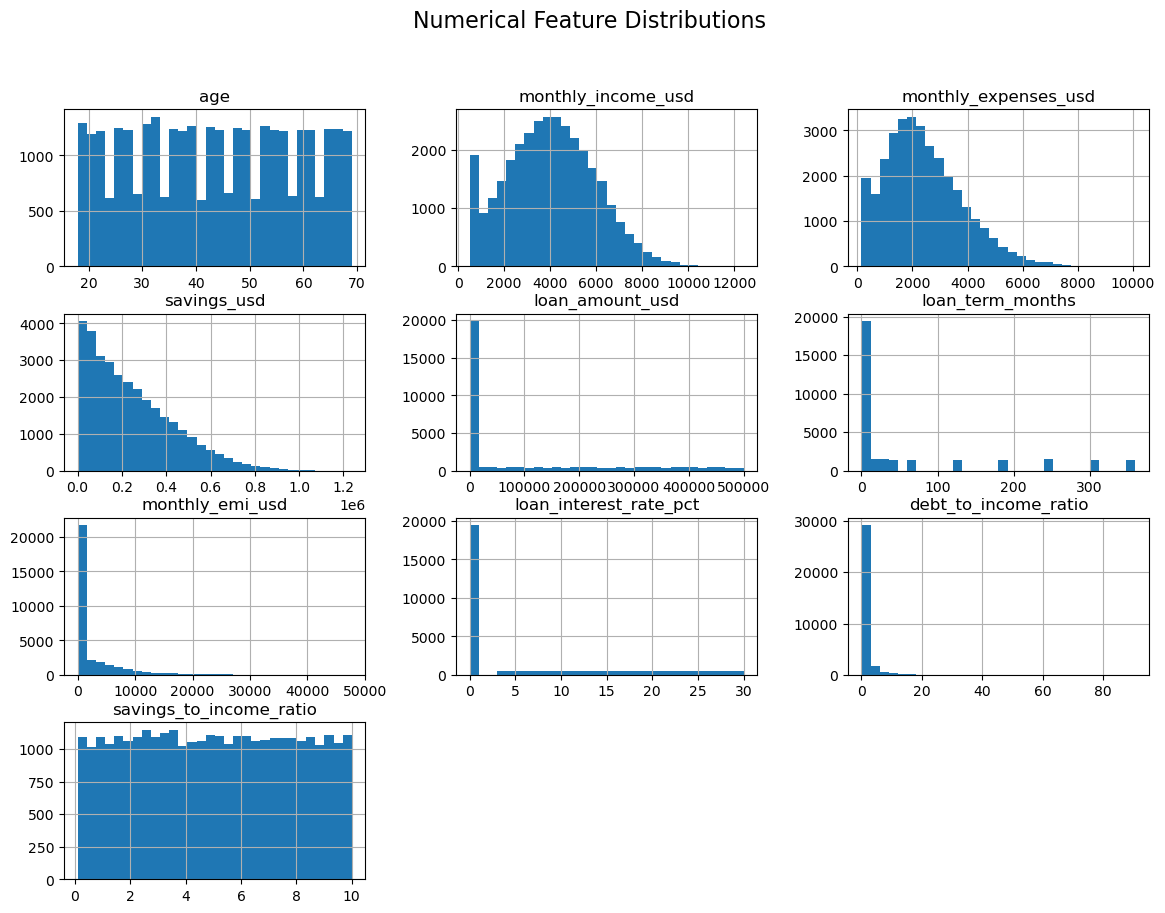

In [6]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
num_cols = [c for c in num_cols if c != "credit_score"]

df[num_cols].hist(figsize=(14,10), bins=30)
plt.suptitle("Numerical Feature Distributions", fontsize=16)
plt.show()

Numeric features used for EDA: ['age', 'monthly_income_usd', 'monthly_expenses_usd', 'savings_usd', 'loan_amount_usd', 'loan_term_months', 'monthly_emi_usd', 'loan_interest_rate_pct', 'debt_to_income_ratio', 'savings_to_income_ratio']


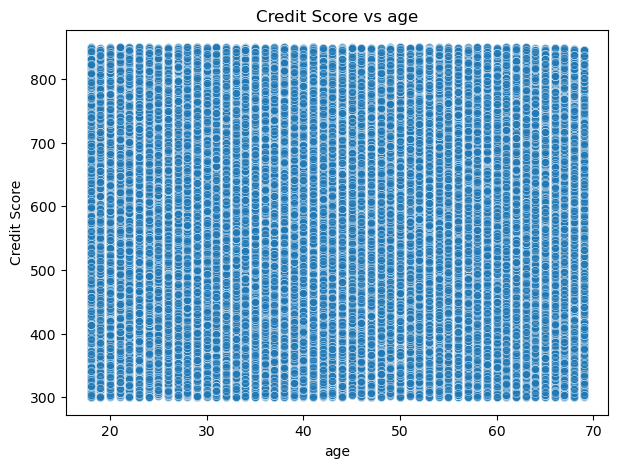

In [7]:
# Automatically pick a meaningful numeric feature (excluding target)
num_features = df.select_dtypes(include=["int64", "float64"]).columns
num_features = [c for c in num_features if c != "credit_score"]

print("Numeric features used for EDA:", num_features)

plt.figure(figsize=(7,5))
sns.scatterplot(
    x=num_features[0],
    y="credit_score",
    data=df,
    alpha=0.6
)
plt.xlabel(num_features[0])
plt.ylabel("Credit Score")
plt.title(f"Credit Score vs {num_features[0]}")
plt.show()

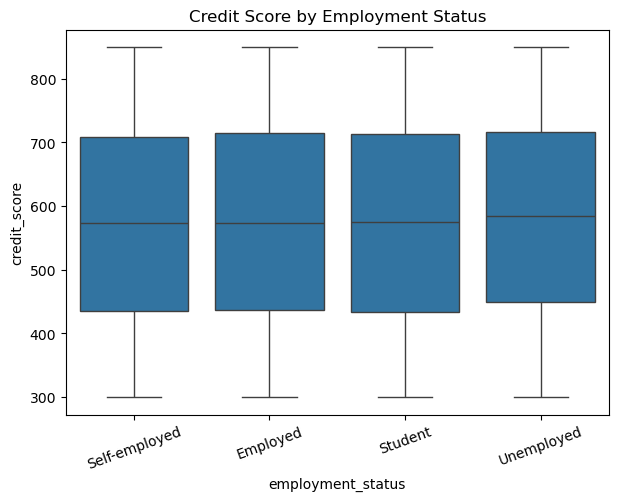

In [8]:
plt.figure(figsize=(7,5))
sns.boxplot(
    x="employment_status",
    y="credit_score",
    data=df
)
plt.xticks(rotation=20)
plt.title("Credit Score by Employment Status")
plt.show()

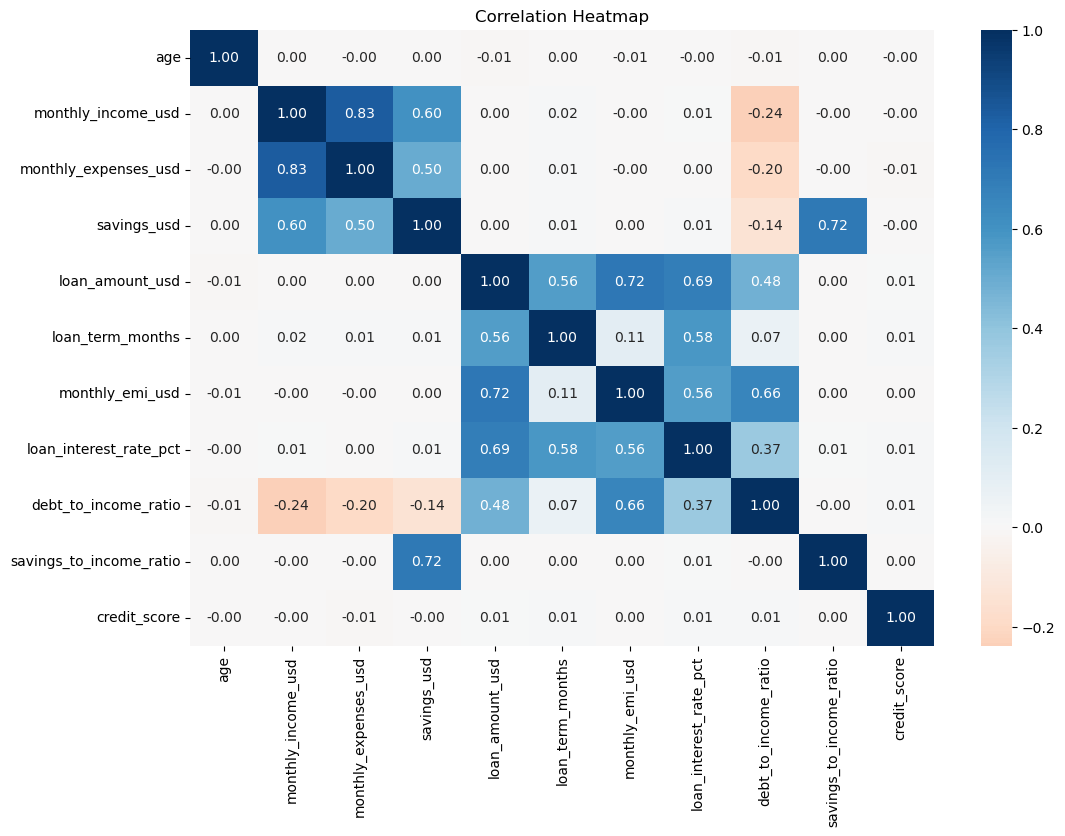

In [9]:
plt.figure(figsize=(12,8))
corr = df[num_cols + ["credit_score"]].corr()

sns.heatmap(
    corr,
    annot=True,
    cmap="RdBu",
    center=0,
    fmt=".2f"
)
plt.title("Correlation Heatmap")
plt.show()

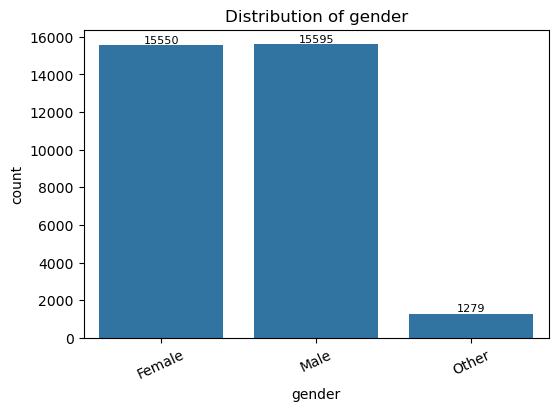

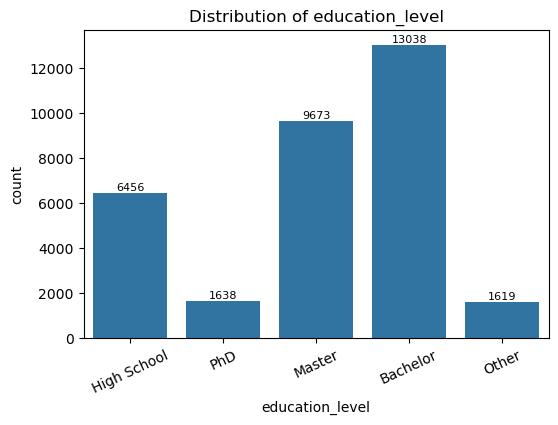

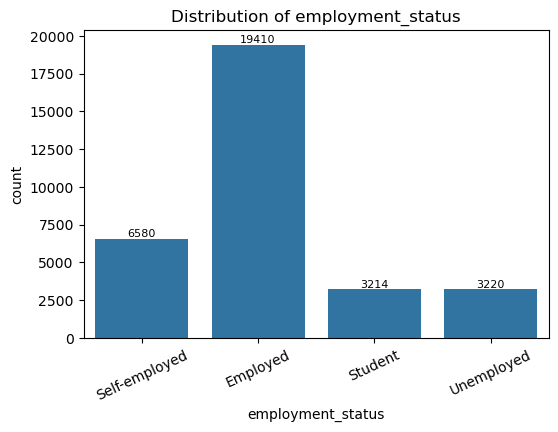

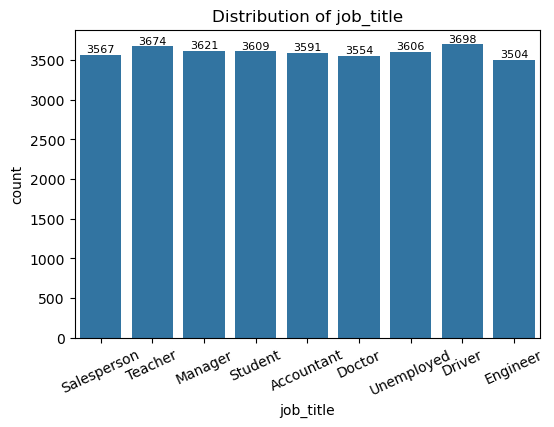

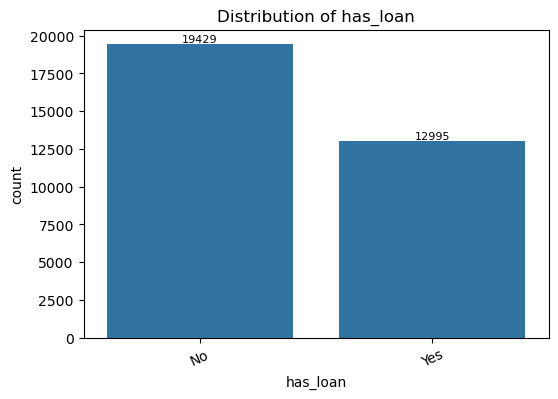

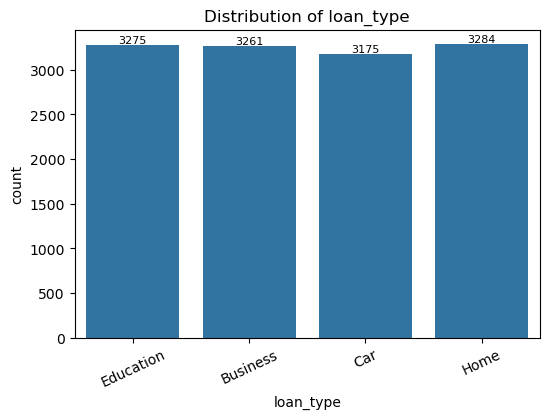

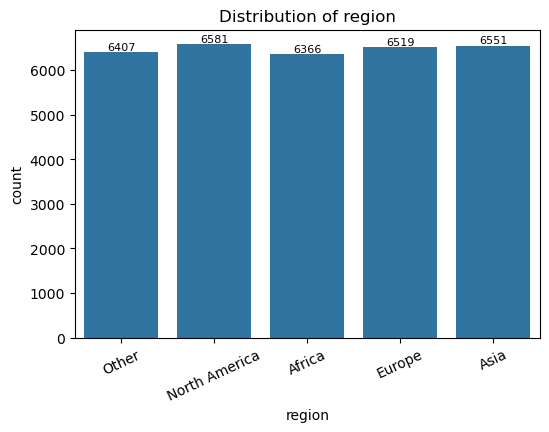

In [10]:
cat_cols = df.select_dtypes(include="object").columns

for col in cat_cols:
    plt.figure(figsize=(6,4))
    ax = sns.countplot(x=col, data=df)

    for p in ax.patches:
        ax.annotate(
            int(p.get_height()),
            (p.get_x() + p.get_width()/2, p.get_height()),
            ha="center", va="bottom", fontsize=8
        )

    plt.xticks(rotation=25)
    plt.title(f"Distribution of {col}")
    plt.show()

In [11]:
TARGET = "credit_score"

X = df.drop(TARGET, axis=1)
y = df[TARGET]

In [12]:
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns

In [13]:
numeric_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_pipeline, num_cols),
    ("cat", categorical_pipeline, cat_cols)
])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Support Vector Regressor": SVR(kernel="rbf"),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5)
}

In [16]:
results = []

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    results.append({
        "Model": name,
        "R2 Score": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
    })

results_df = pd.DataFrame(results)
results_df

,Model,R2 Score,MAE,RMSE
0,Linear Regression,-0.000994,138.867197,160.030993
1,Ridge Regression,-0.000993,138.867177,160.030903
2,Lasso Regression,-0.000945,138.866177,160.027032
3,Support Vector Regressor,-0.000723,138.921905,160.009266
4,KNN Regressor,-0.208725,148.737517,175.853897


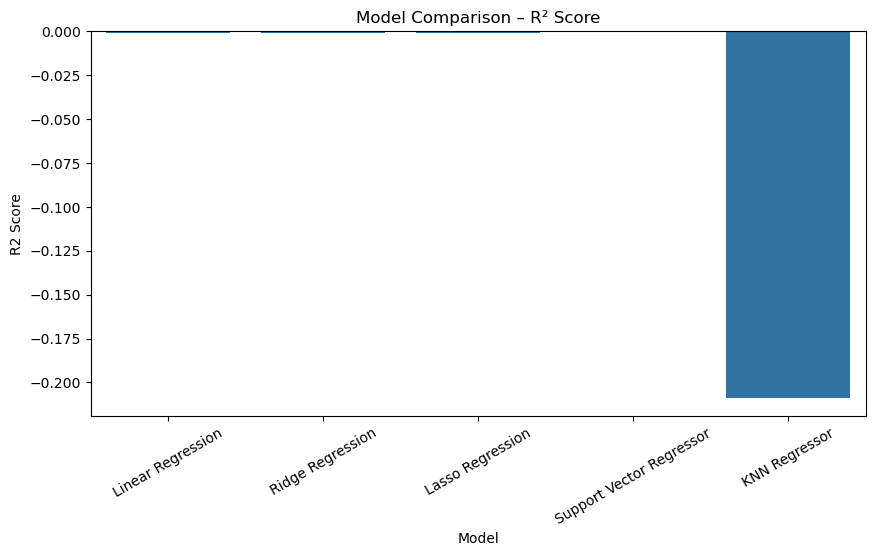

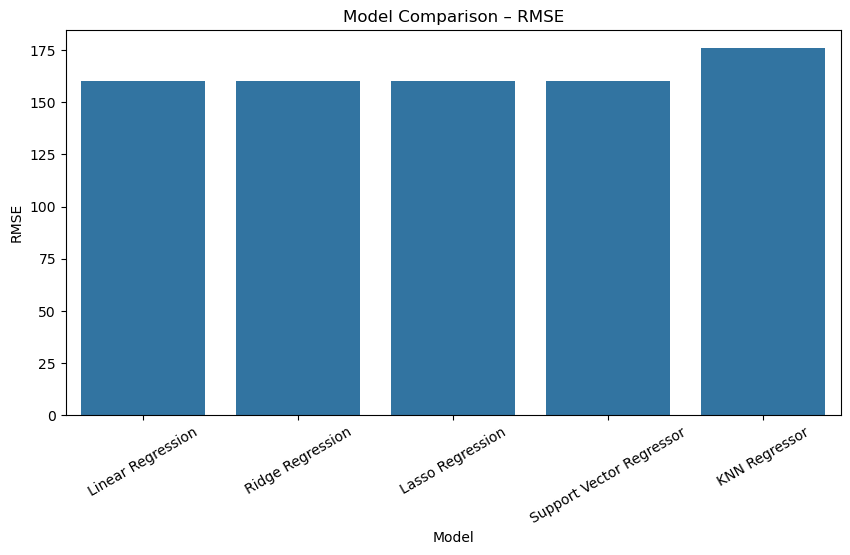

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="R2 Score", data=results_df)
plt.xticks(rotation=30)
plt.title("Model Comparison – R² Score")
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="RMSE", data=results_df)
plt.xticks(rotation=30)
plt.title("Model Comparison – RMSE")
plt.show()

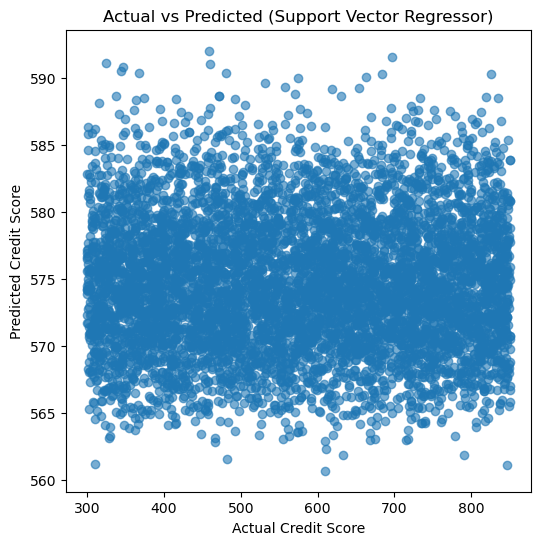

In [18]:
best_model_name = results_df.sort_values("R2 Score", ascending=False).iloc[0]["Model"]

best_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", models[best_model_name])
])

best_pipeline.fit(X_train, y_train)
y_best_pred = best_pipeline.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_best_pred, alpha=0.6)
plt.xlabel("Actual Credit Score")
plt.ylabel("Predicted Credit Score")
plt.title(f"Actual vs Predicted ({best_model_name})")
plt.show()

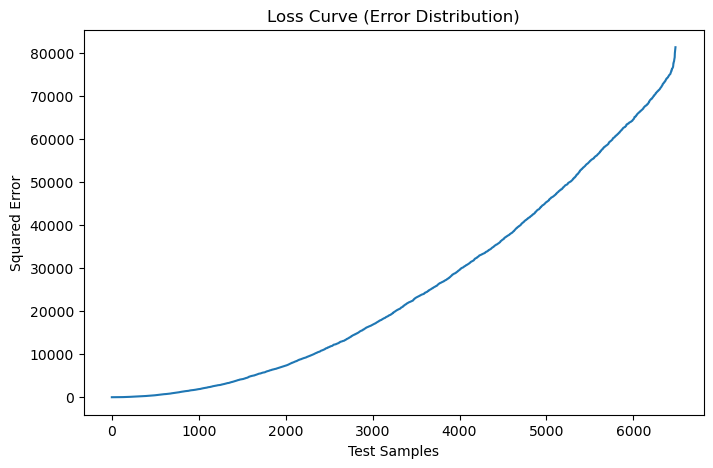

In [19]:
errors = (y_test - y_best_pred) ** 2

plt.figure(figsize=(8,5))
plt.plot(np.sort(errors))
plt.xlabel("Test Samples")
plt.ylabel("Squared Error")
plt.title("Loss Curve (Error Distribution)")
plt.show()